In [1]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
df = pd.read_csv('players_20.csv')


In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
df = pd.read_csv('players_20.csv')

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
df=pd.read_csv("players_20.csv", usecols=['overall','attacking_crossing', 'attacking_finishing','value_eur', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'])
df

,overall,value_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,95500000,88,95,70,92,88,97,93,94,...,75,96,33,37,26,6,11,15,14,8
1,93,58500000,84,94,89,83,87,89,81,76,...,85,95,28,32,24,7,11,15,14,11
2,92,105500000,87,87,62,87,87,96,88,87,...,90,94,27,26,29,9,9,15,15,11
3,91,77500000,13,11,15,43,13,12,13,14,...,11,68,27,12,18,87,92,78,90,89
4,91,90000000,81,84,61,89,83,95,83,79,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,48,40000,21,17,40,35,27,24,23,21,...,39,41,45,50,52,5,5,13,5,14
18274,48,40000,24,20,42,43,28,32,24,29,...,37,35,42,53,57,13,6,14,11,9
18275,48,40000,32,33,49,53,32,40,32,32,...,36,39,46,52,46,7,8,10,6,14
18276,48,40000,39,34,47,54,28,42,37,39,...,36,40,39,44,54,14,9,13,13,13


In [6]:
df.isnull().sum()

overall                       0
value_eur                     0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeep

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   overall                     18278 non-null  int64
 1   value_eur                   18278 non-null  int64
 2   attacking_crossing          18278 non-null  int64
 3   attacking_finishing         18278 non-null  int64
 4   attacking_heading_accuracy  18278 non-null  int64
 5   attacking_short_passing     18278 non-null  int64
 6   attacking_volleys           18278 non-null  int64
 7   skill_dribbling             18278 non-null  int64
 8   skill_curve                 18278 non-null  int64
 9   skill_fk_accuracy           18278 non-null  int64
 10  skill_long_passing          18278 non-null  int64
 11  skill_ball_control          18278 non-null  int64
 12  movement_acceleration       18278 non-null  int64
 13  movement_sprint_speed       18278 non-null  int64
 14  moveme

C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew of the distribution is 0.07089343291701235
Kurtosis of the distribution is 0.05761583098542822


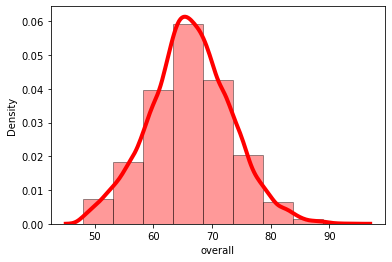

In [8]:
import seaborn as sns
import numpy as np

bins = np.linspace(df.overall.min(), df.overall.max(), 10)
sns.distplot(df['overall'], hist=True, 
             bins=bins, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print('Skew of the distribution is', df['overall'].skew())
print('Kurtosis of the distribution is', df['overall'].kurt())

# correlation of overall data

In [9]:
correlation = df.corr()

In [10]:
df.corr()

,overall,value_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
overall,1.000000,0.638230,0.389078,0.342372,0.345784,0.503157,0.394152,0.370639,0.415521,0.389790,...,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
value_eur,0.638230,1.000000,0.250012,0.252399,0.192478,0.333462,0.283819,0.268482,0.285154,0.256831,...,0.234947,0.457112,0.154734,0.125180,0.102949,-0.022094,-0.022119,-0.023048,-0.020554,-0.021607
attacking_crossing,0.389078,0.250012,1.000000,0.669081,0.476990,0.810796,0.695453,0.864329,0.837687,0.763377,...,0.654811,0.598011,0.451027,0.431927,0.412995,-0.665124,-0.663571,-0.662655,-0.663568,-0.665659
attacking_finishing,0.342372,0.252399,0.669081,1.000000,0.487541,0.673158,0.891961,0.829514,0.771683,0.707490,...,0.847101,0.568326,0.038772,-0.014762,-0.053809,-0.593162,-0.591540,-0.588609,-0.589306,-0.591220
attacking_heading_accuracy,0.345784,0.192478,0.476990,0.487541,1.000000,0.658721,0.519260,0.566755,0.452491,0.414251,...,0.567860,0.540732,0.589378,0.564669,0.537327,-0.748714,-0.748099,-0.744995,-0.744403,-0.748527
attacking_short_passing,0.503157,0.333462,0.810796,0.673158,0.658721,1.000000,0.704835,0.851166,0.778343,0.737650,...,0.687828,0.717620,0.580156,0.555009,0.522307,-0.735895,-0.735133,-0.731616,-0.730744,-0.735670
attacking_volleys,0.394152,0.283819,0.695453,0.891961,0.519260,0.704835,1.000000,0.814068,0.811759,0.753569,...,0.839344,0.620341,0.129128,0.082132,0.043186,-0.595148,-0.593584,-0.590003,-0.590405,-0.593034
skill_dribbling,0.370639,0.268482,0.864329,0.829514,0.566755,0.851166,0.814068,1.000000,0.848457,0.758723,...,0.776941,0.631681,0.351134,0.318368,0.290333,-0.760779,-0.759155,-0.756594,-0.756841,-0.760523
skill_curve,0.415521,0.285154,0.837687,0.771683,0.452491,0.778343,0.811759,0.848457,1.000000,0.861202,...,0.758939,0.640294,0.301764,0.268886,0.239226,-0.610074,-0.606872,-0.604970,-0.606217,-0.608372
skill_fk_accuracy,0.389790,0.256831,0.763377,0.707490,0.414251,0.737650,0.753569,0.758723,0.861202,1.000000,...,0.739872,0.603169,0.307811,0.283099,0.251654,-0.559208,-0.556264,-0.553137,-0.555702,-0.557346


In [11]:
correlation['overall'].sort_values(ascending =False)

overall                       1.000000
movement_reactions            0.864526
mentality_composure           0.719992
value_eur                     0.638230
power_shot_power              0.567504
mentality_vision              0.509251
attacking_short_passing       0.503157
skill_long_passing            0.487289
skill_ball_control            0.457052
power_long_shots              0.425081
skill_curve                   0.415521
mentality_aggression          0.399434
attacking_volleys             0.394152
skill_fk_accuracy             0.389790
attacking_crossing            0.389078
skill_dribbling               0.370639
power_stamina                 0.370344
power_strength                0.361543
mentality_positioning         0.356025
mentality_penalties           0.347950
attacking_heading_accuracy    0.345784
attacking_finishing           0.342372
mentality_interceptions       0.315582
defending_marking             0.303075
power_jumping                 0.267553
movement_agility         

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

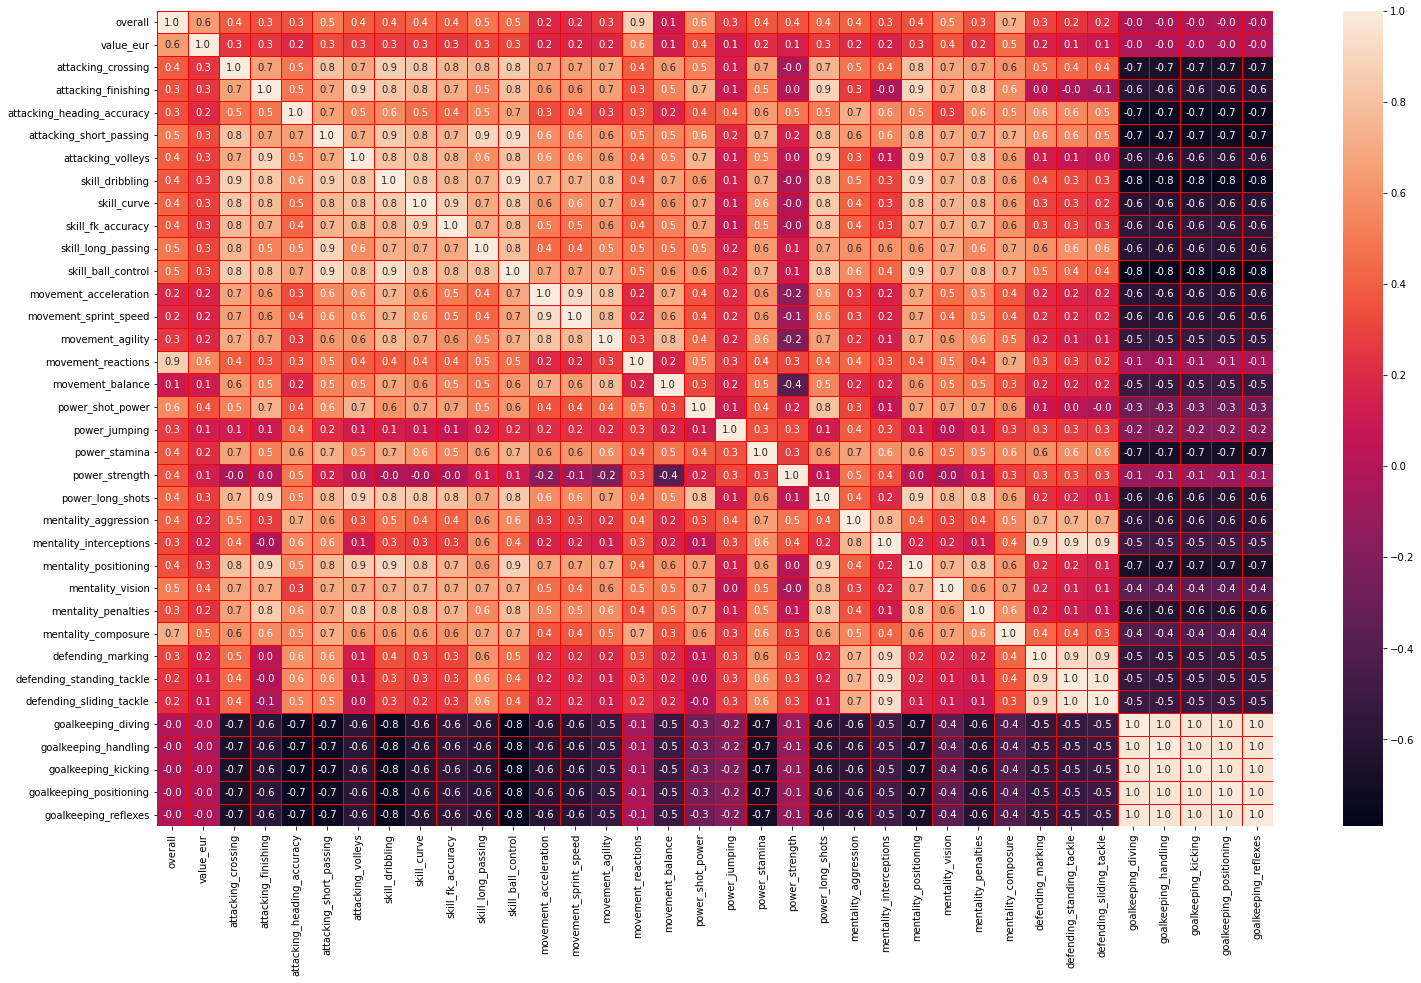

In [13]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

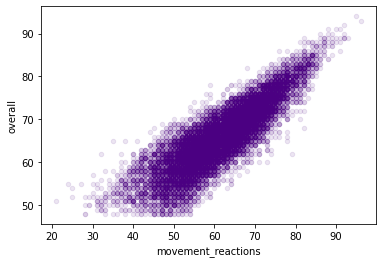

In [47]:
# stronger correlations of movement_reaactions
df.plot(kind="scatter", x="movement_reactions", y="overall", alpha=0.1, color="indigo")
plt.show()

# Training and testing data

In [14]:
import xgboost as xgb # xgboost content 
from sklearn.metrics import balanced_accuracy_score ,roc_auc_score ,make_scorer #for scoring during optimisation
from sklearn.model_selection import GridSearchCV # cross validation 
from sklearn.metrics import confusion_matrix # creates a consusion matrix
from sklearn.metrics import plot_confusion_matrix #drawing a confusion matrix
from sklearn import neighbors

In [15]:
from sklearn.model_selection import train_test_split
# assigning independent and dependent variables
df_1 =pd.DataFrame({'overall':df['overall'],
                    'movement_reactions':df['movement_reactions'],
                    'mentality_composure':df['mentality_composure'],
                    'power_shot_power':df['power_shot_power'],
                    'mentality_vision':df['mentality_vision'],
                    'attacking_short_passing':df['attacking_short_passing']}
                  )

X =df_1.drop(['overall'],axis=1)
y =df_1['overall']

X =X.astype(int)
y = y.astype(int)
# Splitting into train and test data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state =40)

In [16]:
#classification stagexa
X_train =X_train.astype(int)
y_train = y_train.astype(int)
X_test =X_test.astype(int)
y_test = y_test.astype(int)
clf_xgb =xgb.XGBRegressor()
clf_xgb.fit(X_train,y_train,)
model = neighbors.KNeighborsRegressor(n_neighbors =10000)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10000)

In [17]:
y_pred = clf_xgb.predict(X_test)
'''
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE :', rmse)
print('MAE: ', mean_absolute_error(y_test, y_pred))'''
y_pred = clf_xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE :', rmse)
print('MAE: ', mean_absolute_error(y_test, y_pred))

RMSE : 3.6366612711158806
MAE:  2.8432152036504097


In [18]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error
predictions=lin_reg.predict(X_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse

4.069339489360323

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
    ])

params_knn = {
    'knn__n_neighbors': range(1, 20)
    }

search_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=params_knn,
                      cv = 5,
                      return_train_score=True)

search_knn.fit(X_train, y_train)
print(f" Best score is: {search_knn.best_score_} with parameters: {search_knn.best_params_}")

C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


 Best score is: 0.09471911793936419 with parameters: {'knn__n_neighbors': 9}


In [22]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
from scipy import stats
from sklearn.metrics import mean_squared_error
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.5676691468095427

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(forest_scores)

Scores: [3.44803221 3.7019103  3.60921096 3.64731685 3.74741233 3.66996222
 3.57055801 3.67934834 3.80295922 3.67762786]
Mean: 3.655433831824083
Standard Deviation: 0.09277994171193894


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
grid_search.best_params_
{'max_features': 8, 'n_estimators': 30}

{'max_features': 8, 'n_estimators': 30}

In [27]:
#evaluating model

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.6375204385162077

In [28]:
#cross validation of model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [3.95415644 4.04146738 4.12188649 4.00640636 4.33983418 4.2654349
 4.1555232  4.18818153 4.28666075 4.10238244]
Mean: 4.146193366107015
Standard Deviation: 0.11966318717991768


In [29]:
scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores: [3.44808534 3.69906015 3.61320664 3.64659483 3.74867679 3.67184651
 3.56921823 3.67821866 3.80472085 3.68056656]
Mean: 3.656019454363398
Standard Deviation: 0.09305302609411456


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_
{'max_features': 8, 'n_estimators': 30}

{'max_features': 8, 'n_estimators': 30}

In [32]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


3.6388493583263353

In [48]:
f = pd.read_csv('players_19.csv')

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_3900/1491599814.py, line 1)

In [49]:
f=pd.read_csv("players_19.csv", usecols=['overall','attacking_crossing', 'attacking_finishing','value_eur', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'])
f

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_3900/694227519.py, line 2)

In [35]:
from sklearn.model_selection import train_test_split

In [51]:
#comparing model with anothe fifa data set
f = pd.read_csv("players_19.csv")
columns =['overall','movement_reactions','mentality_composure','power_shot_power','mentality_vision']
some_data = f[columns]
some_data2= some_data.iloc[0:10]
print(final_model.predict(some_data2))
print(list(f['overall'].iloc[0:10]))


[93. 93. 93. 93. 93. 93. 93. 93. 93. 93.]
[94, 94, 92, 91, 91, 91, 91, 91, 91, 90]


C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
import xgboost as xgb # xgboost content 
from sklearn.metrics import balanced_accuracy_score ,roc_auc_score ,make_scorer #for scoring during optimisation
from sklearn.model_selection import GridSearchCV # cross validation 
from sklearn.metrics import confusion_matrix # creates a consusion matrix
from sklearn.metrics import plot_confusion_matrix #drawing a confusion matrix
from sklearn import neighbors

In [42]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(f, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(f))

Length of training data: 14468
Length of testing data: 3617
Length of total data: 18085


In [43]:
y_train = train_set['overall']
X_train = train_set.drop('overall', axis=1)
y_test = test_set['overall']
X_test = test_set.drop('overall', axis=1)

In [45]:
f.isna().sum()

overall                0
movement_reactions     0
mentality_composure    0
power_shot_power       0
mentality_vision       0
dtype: int64

In [50]:
f= pd.read_csv("players_19.csv")
columns =({'overall':f['overall'],
          'movement_reactions':f['movement_reactions'],
          'mentality_composure':f['mentality_composure'],
          'power_shot_power':f['power_shot_power'],
          'mentality_vision':f['mentality_vision'],
          'attacking_short_passing':f['attacking_short_passing']})
         
                 
                   
f = diff_dataset[columns]
f= some_data.iloc[1:10]
print(final_model.predict(f))
print(list(diff_dataset['overall'].iloc[1:10]))

[93. 93. 93. 93. 93. 93. 93. 93. 93.]
[94, 92, 91, 91, 91, 91, 91, 91, 90]


C:\Users\Lenovo IdeaPad 310\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
